<a href="https://colab.research.google.com/github/rroxy08/CE888/blob/master/lab4/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [3]:
dframe=pd.read_csv("https://raw.githubusercontent.com/rroxy08/CE888/master/lab4/bank-additional-full.csv",delimiter=";")

#dframe.columns
features=["age","job","education","contact","campaign"]
outcomes=["y"]

dframe[["job"]] = dframe[["job"]].apply(LabelEncoder().fit_transform)
dframe[["education"]] = dframe[["education"]].apply(LabelEncoder().fit_transform)
dframe[["contact"]] = dframe[["contact"]].apply(LabelEncoder().fit_transform)


dframe[features]

,age,job,education,contact,campaign
0,56,3,0,1,1
1,57,7,3,1,1
2,37,7,3,1,1
3,40,0,1,1,1
4,56,7,3,1,1
...,...,...,...,...,...
41183,73,5,5,0,1
41184,46,1,5,0,1
41185,56,5,6,0,2
41186,44,9,5,0,1


In [4]:
#TASK-1:Convert to dummies
#TASK-2: Columns "y_no" and "duration" must be deleted

dframe=dframe.dropna()
dframe_dummies=pd.get_dummies(dframe,prefix_sep='_')

if "y_no" in dframe_dummies.columns:
  del dframe_dummies["y_no"]

if "duration" in dframe_dummies.columns:
  del dframe_dummies["duration"]

dframe_dummies["y_yes"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41188, dtype: uint8

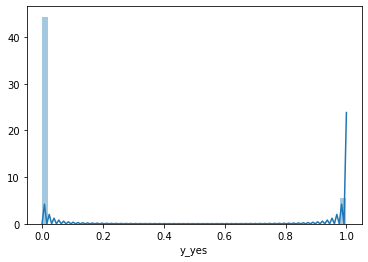

In [5]:
#TASK-3: Plot histogram of the label y_yes
y_dframe=dframe_dummies['y_yes'].copy()

y_dframe
sns_plot = sns.distplot(y_dframe, hist=True)



In [7]:
#TASK-4: Get the values and run a classifier (with outcome y_yes)

X_df=dframe[features].copy()
y_df=dframe[outcomes].copy()

X=X_df.values
y=y_df.values

clf=ExtraTreesClassifier(n_estimators=1000,max_depth=4)
clf.fit(X,y)
print(acc(y,clf.predict(X)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.8873458288821987


In [8]:
#TASK-5: Report the results of 10-Kfold stratified cross-validation

skf= StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
results_skfold = cross_val_score(clf, X, y, cv=skf)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Accuracy: 88.74%


[3 0 2 1 4]
Feature ranking:
1. contact (0.586929)
2. age (0.263273)
3. education (0.066270)
4. job (0.050982)
5. campaign (0.032546)


(0, 0.8234424338218749)

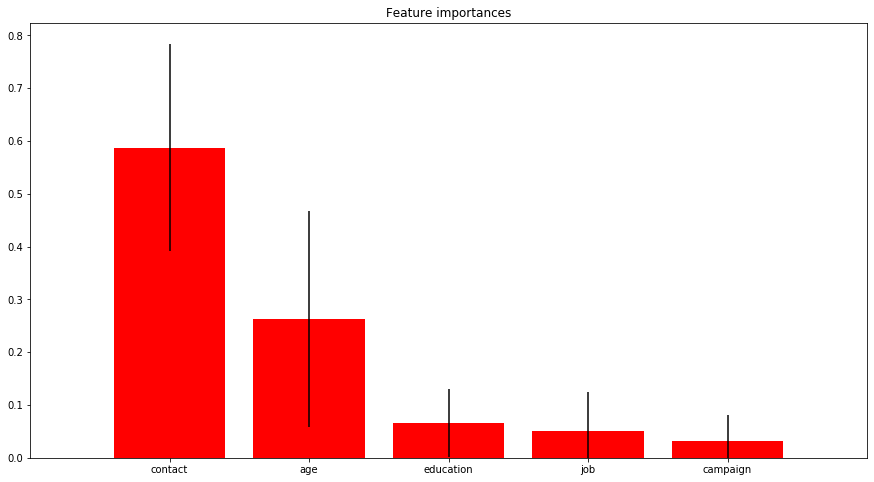

In [10]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# plt.savefig("importances.png",bbox_inches='tight')
# plt.savefig("importances.pdf",bbox_inches='tight')